<a href="https://colab.research.google.com/github/gspandhana/MachineLearning/blob/main/P3_Multilple_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression on Multiple Variables **
### In this script, we are evaluating why having more features is better for a linear regression model.

Dataset: Advertising.csv (can be found in the repository)

**Loading Necessary Libraries and Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
#from helper import fit_and_plot_linear, fit_and_plot_multi
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# Read the file "Advertising.csv"
df = pd.read_csv("Advertising.csv")

# Take a quick look at the dataframe
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df_results = pd.DataFrame(columns=['Predictor', 'R2 Train', 'R2 Test'])

**Helper Functions to take input data (x) and perform linear regression**

In [ ]:

# Function to fit a linear model on the predictor passed as a parameter, compute the parameters
# and plot the fit of the R^2

y = df['sales']

def fit_and_plot_linear(x):

	# Split the data into train and test sets with train size of 0.8
	# Set the random state as 0 to get reproducible results
	x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

	# Initialize a LinearRegression object
	lreg = LinearRegression()

	# Fit the model on the train data
	lreg.fit(x_train, y_train)

	# Predict the response variable of the train set using the trained model
	y_train_pred = lreg.predict(x_train)

	# Predict the response variable of the test set using the trained model
	y_test_pred= lreg.predict(x_test)

	# Compute the R-square for the train predictions
	r2_train = r2_score(y_train, y_train_pred)

	# Compute the R-square for the test predictions
	r2_test = r2_score(y_test, y_test_pred)

	# Code to plot the prediction for the train and test data
	plt.scatter(x_train, y_train, color='#B2D7D0', label = "Train data")
	plt.scatter(x_test, y_test, color='#EFAEA4', label = "Test data")
	plt.plot(x_train, y_train_pred, label="Train Prediction", color='darkblue', linewidth=2)
	plt.plot(x_test, y_test_pred, label="Test Prediction", color='k', alpha=0.8, linewidth=2, linestyle='--')
	name = x.columns.to_list()[0]
	plt.title(f"Plot to indicate linear model predictions")
	plt.xlabel(f"{name}", fontsize=14)
	plt.ylabel("Sales", fontsize=14)
	plt.legend()
	plt.show()

	# Return the r-square of the train and test data
	return r2_train, r2_test


# Function to fit a multilinear model on all the predictors in the dataset passed as a parameter, compute the parameters
# and plot the fit of the R^2
def fit_and_plot_multi():

	# Get the predictor variables
	x = df[['TV','radio','newspaper']]

	# Split the data into train and test sets with train size of 0.8
	# Set the random state as 0 to get reproducible results
	x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

	# Initialize a LinearRegression object to perform Multi-linear regression
	lreg = LinearRegression()

	# Fit the model on the train data
	lreg.fit(x_train, y_train)

	# Predict the response variable of the train set using the trained model
	y_train_pred = lreg.predict(x_train)

	# Predict the response variable of the test set using the trained model
	y_test_pred= lreg.predict(x_test)

	# Compute the R-square for the train predictions
	r2_train = r2_score(y_train, y_train_pred)

	# Compute the R-square for the test predictions
	r2_test = r2_score(y_test, y_test_pred)

	# Return the r-square of the train and test data
	return r2_train, r2_test


**Linear Fit for TV_budget v/s Sales**

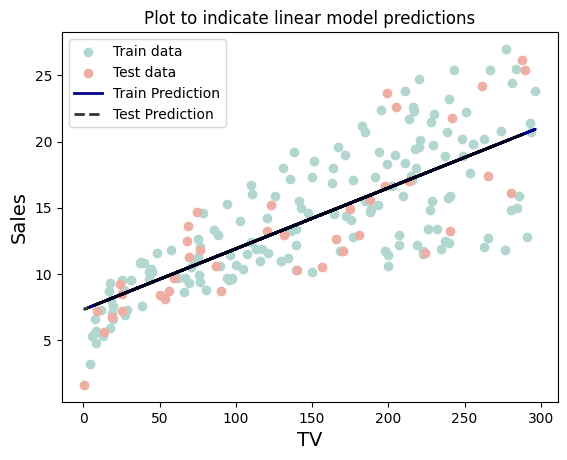

(0.5884742462828709, 0.6763151577939721)

In [ ]:
fit_and_plot_linear(df[["TV"]])

**Linear Fit for Radio_budget v/s Sales**

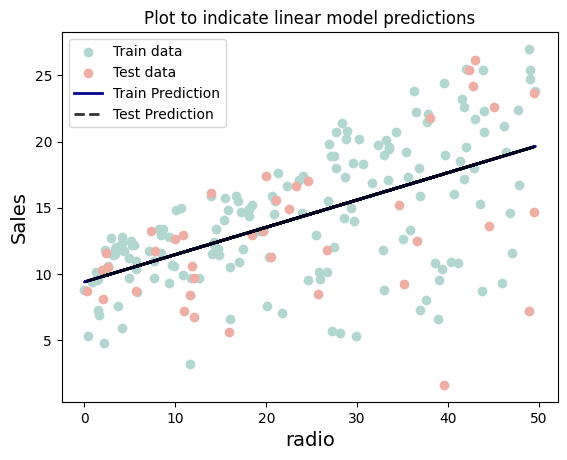

(0.35671845263128477, 0.22981692241915952)

In [ ]:
fit_and_plot_linear(df[["radio"]])

**Linear Fit for Newspaper_budget v/s Sales**

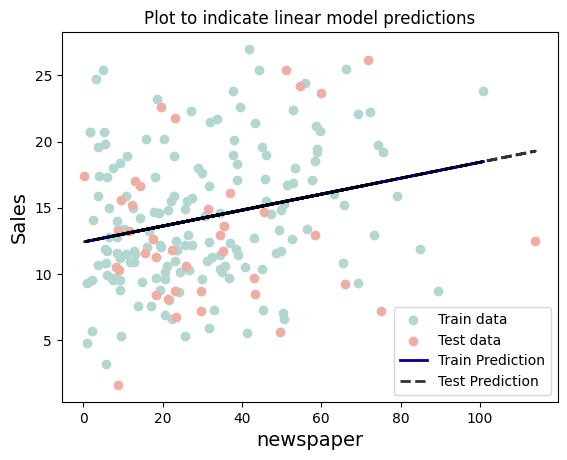

(0.0644163673549869, -0.021217489521373478)

In [ ]:
fit_and_plot_linear(df[["newspaper"]])

**Why are more features better?**

Fitting all the modes of advertisement

In [ ]:
fit_and_plot_multi()

(0.9067114990146383, 0.8601145185017868)

In [ ]:
df_results.loc[0] = ["TV", 0.588, 0.676]
df_results.loc[1] = ["Radio", 0.357, 0.23]
df_results.loc[2] = ["Newspaper", 0.064, -0.02]
df_results.loc[3] = ["TV, Radio, Newspaper", 0.907, 0.86]
df_results

,Predictor,R2 Train,R2 Test
0,TV,0.588,0.676
1,Radio,0.357,0.230
2,Newspaper,0.064,-0.020
3,"TV, Radio, Newspaper",0.907,0.860


Testing the Mean-Squared error of different features

In [ ]:
# Initialize a list to store the MSE values
mse_list = []

# Create a list of lists of all unique predictor combinations
# For example, if you have 2 predictors,  A and B, you would
# end up with [['A'],['B'],['A','B']]
cols = [['TV'],['radio'], ['newspaper'], ['TV','radio'], ['TV','newspaper'], ['radio','newspaper'], ['TV', 'radio', 'newspaper']]

# Loop over all the predictor combinations
for i in cols:

    # Set each of the predictors from the previous list as x

    x = df[i]

    # Set the "Sales" column as the reponse variable
    y = df.sales

    # Split the data into train-test sets with 80% training data and 20% testing data.
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train, y_train)

    # Predict the response variable for the test set using the trained model
    y_pred = lreg.predict(x_test)

    # Compute the MSE for the test data
    MSE = mean_squared_error(y_test, y_pred)

    # Append the computed MSE to the initialized list
    mse_list.append(MSE)



Display the MSE with predictor combinations

In [ ]:
# Helper code to display the MSE for each predictor combination
t = PrettyTable(['Predictors', 'MSE'])

for i in range(len(mse_list)):
    t.add_row([cols[i],round(mse_list[i],3)])

print(t)

+------------------------------+--------+
|          Predictors          |  MSE   |
+------------------------------+--------+
|            ['TV']            | 10.186 |
|          ['radio']           | 24.237 |
|        ['newspaper']         | 32.137 |
|       ['TV', 'radio']        | 4.391  |
|     ['TV', 'newspaper']      | 8.688  |
|    ['radio', 'newspaper']    | 24.783 |
| ['TV', 'radio', 'newspaper'] | 4.402  |
+------------------------------+--------+
